In [190]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cm

path_to_add = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if path_to_add not in sys.path:
    sys.path.insert(0, path_to_add)

from rsimpy.cmg.sr3reader import Sr3Reader

In [191]:
test_file = "../sr3/base_case_3a.sr3"
sr3 = Sr3Reader(test_file)
dataset = sr3.file.get_table("SpatialProperties/000000/GRID")

# Cell Coordinates

In [192]:
nodes = dataset["NODES"][:]
blocks = dataset["BLOCKS"][:]

In [193]:
def _get_cell_nodes(self, cell_n):
    if isinstance(cell_n, int):
        return blocks[8*(cell_n-1):8*cell_n]
    return np.vstack([_get_cell_nodes(self, cell) for cell in cell_n])

c = _get_cell_nodes(sr3.grid, 2205)
print(c.shape)
print(len(c.shape))
print(c)
print("")

c2 = _get_cell_nodes(sr3.grid, [2205, 2206])
print(c2.shape)
print(len(c2.shape))
print(c2)

(8,)
1
[2299 2300 2348 2347 4219 4220 4268 4267]

(2, 8)
2
[[  2299   2300   2348   2347   4219   4220   4268   4267]
 [  2300   2301 560964   2348   4220   4221 561206   4268]]


In [194]:
def _get_cell_edges(self, cell_n):
    nodes_ = _get_cell_nodes(self, cell_n)
    if isinstance(cell_n, int):
        edges = [nodes[3*(n_-1): 3*n_] for n_ in nodes_]
        return np.vstack(edges)
    return np.vstack([[nodes[3*(n_-1): 3*n_] for n_ in n]
                      for n in nodes_]).reshape(-1, 8, 3)

c = _get_cell_edges(sr3.grid, 2205)
print(c.shape)
print(c)
print("")

c2 = _get_cell_edges(sr3.grid, [2205, 2206])
print(c2.shape)
print(c2)

(8, 3)
[[7.78536034e+05 7.28084573e+06 5.47635400e+03]
 [7.78326573e+05 7.28087532e+06 5.49325880e+03]
 [7.78302914e+05 7.28067793e+06 5.49256980e+03]
 [7.78519464e+05 7.28064846e+06 5.46713920e+03]
 [7.78535378e+05 7.28084577e+06 5.47743900e+03]
 [7.78322985e+05 7.28087555e+06 5.49837210e+03]
 [7.78299043e+05 7.28067814e+06 5.49756980e+03]
 [7.78515407e+05 7.28064871e+06 5.47308740e+03]]

(2, 8, 3)
[[[7.78536034e+05 7.28084573e+06 5.47635400e+03]
  [7.78326573e+05 7.28087532e+06 5.49325880e+03]
  [7.78302914e+05 7.28067793e+06 5.49256980e+03]
  [7.78519464e+05 7.28064846e+06 5.46713920e+03]
  [7.78535378e+05 7.28084577e+06 5.47743900e+03]
  [7.78322985e+05 7.28087555e+06 5.49837210e+03]
  [7.78299043e+05 7.28067814e+06 5.49756980e+03]
  [7.78515407e+05 7.28064871e+06 5.47308740e+03]]

 [[7.78326573e+05 7.28087532e+06 5.49325880e+03]
  [7.78103477e+05 7.28090551e+06 5.52160110e+03]
  [7.78075410e+05 7.28070802e+06 5.52315280e+03]
  [7.78302914e+05 7.28067793e+06 5.49256980e+03]
  [7.78

In [195]:
def _get_cell_face_nodes(self, cell_n, face):
    if face == "I-":
        edge_n = [0, 3, 7, 4]
    elif face == "I+":
        edge_n = [1, 2, 6, 5]
    elif face == "J-":
        edge_n = [1, 0, 4, 5]
    elif face == "J+":
        edge_n = [2, 3, 7, 6]
    elif face == "K-":
        edge_n = [0, 1, 2, 3]
    elif face == "K+":
        edge_n = [4, 5, 6, 7]
    else:
        raise ValueError(f"Invalid face: {face}.")
    nodes_ = _get_cell_nodes(self, cell_n)
    if isinstance(cell_n, int):
        return nodes_[edge_n]
    return np.vstack([n_[edge_n] for n_ in nodes_])

c = _get_cell_face_nodes(sr3.grid, 2205, "K-")
print(c.shape)
print(c)
print("")

c2 = _get_cell_face_nodes(sr3.grid, [2205, 2206], "K-")
print(c2.shape)
print(c2)

(4,)
[2299 2300 2348 2347]

(2, 4)
[[  2299   2300   2348   2347]
 [  2300   2301 560964   2348]]


In [196]:
def _get_cell_face(self, cell_n, face):
    nodes_ = _get_cell_face_nodes(self, cell_n, face)

    if isinstance(cell_n, int):
        edges = [nodes[3*(n_-1): 3*n_] for n_ in nodes_]
        return np.vstack(edges)
    return np.vstack([[nodes[3*(n_-1): 3*n_] for n_ in n]
                      for n in nodes_]).reshape(-1, 4, 3)

c = _get_cell_face(sr3.grid, 2205, "K-")
print(c.shape)
print(c)
print("")

c2 = _get_cell_face(sr3.grid, [2205, 2206], "K-")
print(c2.shape)
print(c2)

(4, 3)
[[7.78536034e+05 7.28084573e+06 5.47635400e+03]
 [7.78326573e+05 7.28087532e+06 5.49325880e+03]
 [7.78302914e+05 7.28067793e+06 5.49256980e+03]
 [7.78519464e+05 7.28064846e+06 5.46713920e+03]]

(2, 4, 3)
[[[7.78536034e+05 7.28084573e+06 5.47635400e+03]
  [7.78326573e+05 7.28087532e+06 5.49325880e+03]
  [7.78302914e+05 7.28067793e+06 5.49256980e+03]
  [7.78519464e+05 7.28064846e+06 5.46713920e+03]]

 [[7.78326573e+05 7.28087532e+06 5.49325880e+03]
  [7.78103477e+05 7.28090551e+06 5.52160110e+03]
  [7.78075410e+05 7.28070802e+06 5.52315280e+03]
  [7.78302914e+05 7.28067793e+06 5.49256980e+03]]]


## Plot faces projection in 2D

In [227]:
def face_center(v):
    return np.mean(v, axis=len(v.shape)-2)

In [286]:
# def plot_faces(faces):
#     faces = faces.reshape(-1, 4, 3)

#     def _get_plane(face):
#         """Returns the 'mean' plane of a face."""
#         center = face_center(face)
#         normal = np.array([0.,0.,0.])
#         for i1, i2 in [(0,1), (1,2), (2,3), (3,0)]:
#             normal += np.cross(c[i1] - center, c[i2] - center)
#         normal /= np.linalg.norm(normal)
#         return center, normal

#     def _project_faces(faces, center, normal):
#         delta = faces - center.reshape(-1, 1, 3)
#         dist = np.dot(delta, normal)
#         return delta - dist[:,:,np.newaxis] * normal.reshape(1, 1, 3)

#     def _rotation_matrix(vec1, vec2):
#         """ Find the rotation matrix that aligns vec1 to vec2
#         :param vec1: A 3d "source" vector
#         :param vec2: A 3d "destination" vector
#         :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
#         """
#         a, b = (vec1 / np.linalg.norm(vec1)).reshape(3), (vec2 / np.linalg.norm(vec2)).reshape(3)
#         v = np.cross(a, b)
#         c = np.dot(a, b)
#         s = np.linalg.norm(v)
#         kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
#         rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
#         return rotation_matrix

#     def _are_points_rotated(faces, tol=1e-10):
#         centers = face_center(faces)
#         centers = np.repeat(centers[:, np.newaxis, :], 4, axis=1)
#         sum2 = ((faces - centers)**2).sum(axis=1)
#         ratio = sum2.min(axis=1) / (sum2.max(axis=1) + 1E-30)
#         return (ratio < tol)

#     center, normal = _get_plane(faces[0])
#     print(normal)
#     faces_proj = _project_faces(faces, center, normal)

#     z_axis = np.array([0, 0, 0])
#     i = np.argmax(np.abs(normal))
#     z_axis[i] = 1 * np.sign(normal[i])
#     print(z_axis)

#     rotation_matrix = _rotation_matrix(normal, z_axis)
#     faces_rotated = faces_proj.dot(rotation_matrix.T)
#     for i,v in enumerate(_are_points_rotated(faces_rotated)):
#         if not v:
#             faces_rotated[i] = np.zeros_like(faces_rotated[i])
#     # if not _are_points_rotated(faces_rotated):
#     #     msg = "The points are not correctly rotated."
#     #     raise ValueError(msg)

#     faces_rotated = faces_rotated[:, :, :2]

#     colors = plt.get_cmap('tab10').colors
#     fig, axs = plt.subplots(1,1, figsize=(5,5))
#     for i, face in enumerate(faces_rotated):
#         color = colors[i % len(colors)]
#         axs.plot(face[0, 0], face[0, 1], 'o', color=color)
#         axs.plot(face[:, 0], face[:, 1], '-', color=color)
#         # axs.plot(face[[-1, 0], 0], face[[-1, 0], 1], '-', color=color)
#     plt.grid(True)
#     if z_axis[2] == 1:
#         plt.axis('equal')

#     return fig, axs


In [312]:
def plot_faces2(faces):
    faces = faces.reshape(-1, 4, 3)

    def _get_plane(face):
        """Returns the 'mean' plane of a face."""
        center = face_center(face)
        normal = np.array([0.,0.,0.])
        for i1, i2 in [(0,1), (1,2), (2,3), (3,0)]:
            normal += np.cross(c[i1] - center, c[i2] - center)
        normal /= np.linalg.norm(normal)
        return center, normal

    def _project_faces(faces, center, normal):
        delta = faces - center.reshape(-1, 1, 3)
        dist = np.dot(delta, normal)
        return delta - dist[:,:,np.newaxis] * normal.reshape(1, 1, 3)

    center, normal = _get_plane(faces[0])
    # print(normal)

    z_axis = np.array([0, 0, 0])
    i = np.argmax(np.abs(normal))
    z_axis[i] = 1 * np.sign(normal[i])
    # print(z_axis)

    faces_proj = _project_faces(faces, center, z_axis)

    faces_rotated = np.delete(faces_proj, i, axis=2)

    colors = plt.get_cmap('tab10').colors
    fig, axs = plt.subplots(1,1, figsize=(5,5))
    for i, face in enumerate(faces_rotated):
        color = colors[i % len(colors)]
        # axs.plot(face[0, 0], face[0, 1], 'o', color=color)
        axs.plot(face[:, 0], face[:, 1], '-', color=color)
        axs.plot(face[[-1, 0], 0], face[[-1, 0], 1], '-', color=color)
    plt.grid(True)
    if z_axis[2] == 1:
        plt.axis('equal')

    return fig, axs

* Verificar de usar normal 'média' de todas a faces.
* Não limitar a i,j,k, e usar 'melhor' plano vertical.
    * Teria que rotacionar no plano x,y.

    https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation#Performance_comparisons

    https://www.vbforums.com/showthread.php?874965-Rotation-using-DOT-product
    
    https://en.wikipedia.org/wiki/Rotation_matrix

[[7.78548819e+05 7.28104262e+06 5.49571920e+03]
 [7.78536034e+05 7.28084573e+06 5.47635400e+03]
 [7.78535378e+05 7.28084577e+06 5.47743900e+03]
 [7.78548819e+05 7.28104262e+06 5.49571920e+03]]
[-0.14001422 -0.98763446 -0.07052795]
[ 0 -1  0]


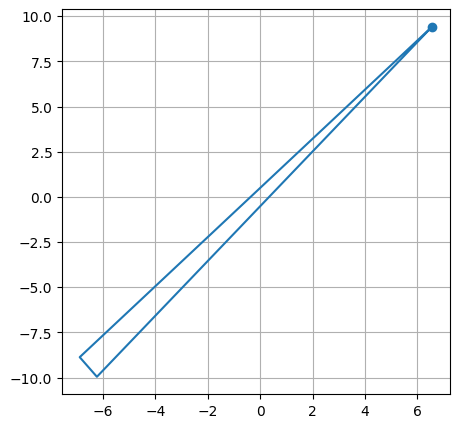

[[7.78536034e+05 7.28084573e+06 5.47635400e+03]
 [7.78519464e+05 7.28064846e+06 5.46713920e+03]
 [7.78515407e+05 7.28064871e+06 5.47308740e+03]
 [7.78535378e+05 7.28084577e+06 5.47743900e+03]]
[-0.14001422 -0.98763446 -0.07052795]
[ 0 -1  0]


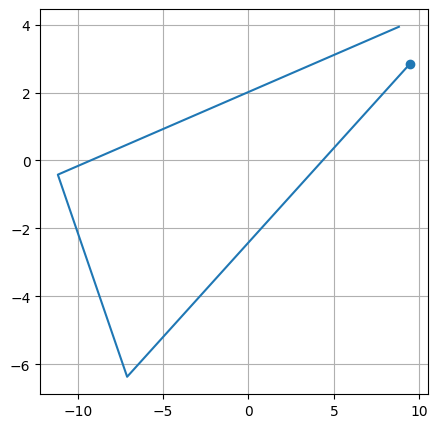

[[[7.78548819e+05 7.28104262e+06 5.49571920e+03]
  [7.78536034e+05 7.28084573e+06 5.47635400e+03]
  [7.78535378e+05 7.28084577e+06 5.47743900e+03]
  [7.78548819e+05 7.28104262e+06 5.49571920e+03]]

 [[7.78536034e+05 7.28084573e+06 5.47635400e+03]
  [7.78519464e+05 7.28064846e+06 5.46713920e+03]
  [7.78515407e+05 7.28064871e+06 5.47308740e+03]
  [7.78535378e+05 7.28084577e+06 5.47743900e+03]]

 [[7.78519464e+05 7.28064846e+06 5.46713920e+03]
  [7.78493902e+05 7.28045119e+06 5.47195950e+03]
  [7.78493116e+05 7.28045123e+06 5.47300540e+03]
  [7.78515407e+05 7.28064871e+06 5.47308740e+03]]]
[-0.14001422 -0.98763446 -0.07052795]
[ 0 -1  0]


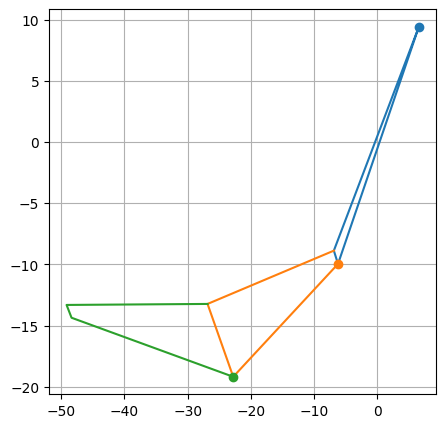

[[[7.78341267e+05 7.28107247e+06 5.50916260e+03]
  [7.78548819e+05 7.28104262e+06 5.49571920e+03]
  [7.78548819e+05 7.28104262e+06 5.49571920e+03]
  [7.78341267e+05 7.28107247e+06 5.50916260e+03]]

 [[7.78326573e+05 7.28087532e+06 5.49325880e+03]
  [7.78536034e+05 7.28084573e+06 5.47635400e+03]
  [7.78535378e+05 7.28084577e+06 5.47743900e+03]
  [7.78322985e+05 7.28087555e+06 5.49837210e+03]]

 [[7.78302914e+05 7.28067793e+06 5.49256980e+03]
  [7.78519464e+05 7.28064846e+06 5.46713920e+03]
  [7.78515407e+05 7.28064871e+06 5.47308740e+03]
  [7.78299043e+05 7.28067814e+06 5.49756980e+03]]]
[-0.14001422 -0.98763446 -0.07052795]
[ 0 -1  0]


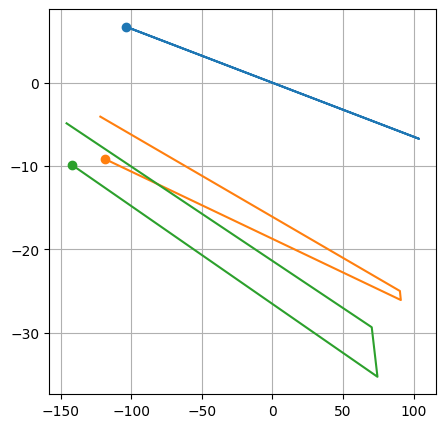

[[7.78103477e+05 7.28090551e+06 5.52160110e+03]
 [7.78326573e+05 7.28087532e+06 5.49325880e+03]
 [7.78322985e+05 7.28087555e+06 5.49837210e+03]
 [7.78102412e+05 7.28090557e+06 5.52293700e+03]]
[-0.14001422 -0.98763446 -0.07052795]
[ 0 -1  0]


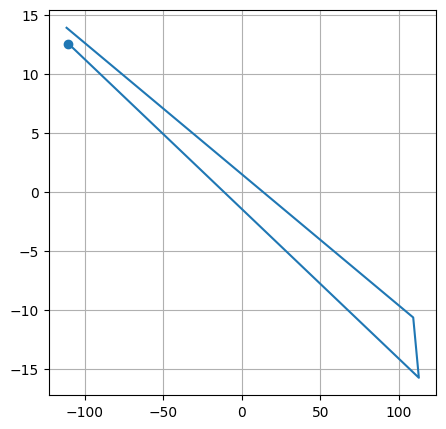

[[7.78075410e+05 7.28070802e+06 5.52315280e+03]
 [7.78302914e+05 7.28067793e+06 5.49256980e+03]
 [7.78299043e+05 7.28067814e+06 5.49756980e+03]
 [7.78073684e+05 7.28070810e+06 5.52510790e+03]]
[-0.14001422 -0.98763446 -0.07052795]
[ 0 -1  0]


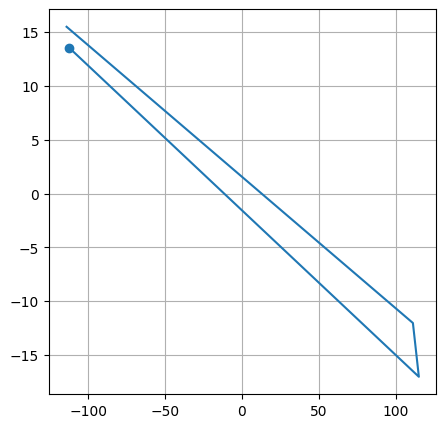

In [309]:
c1 = _get_cell_face(sr3.grid, 2158, "I-")
print(c1)
plot_faces2(c1)
plt.show()

c1 = _get_cell_face(sr3.grid, 2205, "I-")
print(c1)
plot_faces2(c1)
plt.show()

c3 = _get_cell_face(sr3.grid, [2158, 2205, 2252], "I-")
print(c3)
plot_faces2(c3)
plt.show()

c3 = _get_cell_face(sr3.grid, [2158, 2205, 2252], "J-")
print(c3)
plot_faces2(c3)
plt.show()

c1 = _get_cell_face(sr3.grid, 2206, "J-")
print(c1)
plot_faces2(c1)
plt.show()
c1 = _get_cell_face(sr3.grid, 2206, "J+")
print(c1)
plot_faces2(c1)
plt.show()


## Face Area

In [204]:
def triangle_area(v1, v2, v3):
    vec1 = v2 - v1
    vec2 = v3 - v1

    cross_product = np.cross(vec1, vec2)
    area = 0.5 * np.linalg.norm(cross_product, axis=1)
    return area

def face_area(v):
    v_center = face_center(v)
    v_ = v.reshape(-1, 4, 3)

    area = triangle_area(v_center, v_[:,0], v_[:,1])
    area += triangle_area(v_center, v_[:,1], v_[:,2])
    area += triangle_area(v_center, v_[:,2], v_[:,3])
    area += triangle_area(v_center, v_[:,3], v_[:,0])

    if len(v.shape) == 2:
        return area[0]
    return area

print(face_area(c))
print(face_area(c2))

42849.33788290243
[42849.3378829  45642.40312674]


In [205]:
print("I")
c3 = _get_cell_face(sr3.grid, [2205, 2206, 2207], "I-")
print(face_area(c3))
c3 = _get_cell_face(sr3.grid, [2205, 2206, 2207], "I+")
print(face_area(c3))

print("J")
c3 = _get_cell_face(sr3.grid, [2205, 2206, 2207], "J-")
print(face_area(c3))
c3 = _get_cell_face(sr3.grid, [2205, 2206, 2207], "J+")
print(face_area(c3))

print("K")
c3 = _get_cell_face(sr3.grid, [2205, 2206, 2207], "K-")
print(face_area(c3))
c3 = _get_cell_face(sr3.grid, [2205, 2206, 2207], "K+")
print(face_area(c3))

I
[ 839.25967415 1249.6053909   429.84768937]
[1.24960539e+03 4.29847689e+02 2.34447811e-08]
J
[620.96352089 661.50642386 139.58556211]
[1099.06585647  714.94186376  198.60597955]
K
[42849.3378829  45642.40312674 48184.34440685]
[43171.66609638 45112.06542104 47864.7371962 ]


## Shared Area Between Cells

In [206]:
cell1 = 9255
cell2 = 11135
direction = 2

print(f"Cell1: {sr3.grid.n2ijk(cell1)}")
print(f"Cell2: {sr3.grid.n2ijk(cell2)}")

Cell1: (43, 2, 6)
Cell2: (43, 3, 7)


In [207]:
face1 = _get_cell_face(sr3.grid, cell1, "J+")
face2 = _get_cell_face(sr3.grid, cell2, "J-")

print(face1)
print(face_area(face1))

print(face2)
print(face_area(face2))

[[7.78427538e+05 7.28185130e+06 5.65072900e+03]
 [7.78625086e+05 7.28182450e+06 5.65013280e+03]
 [7.78625086e+05 7.28182450e+06 5.65013280e+03]
 [7.78426856e+05 7.28185146e+06 5.65572900e+03]]
498.23442639272895
[[7.78426853e+05 7.28185146e+06 5.65575200e+03]
 [7.78625793e+05 7.28182432e+06 5.64479200e+03]
 [7.78625131e+05 7.28182449e+06 5.64979200e+03]
 [7.78426170e+05 7.28185162e+06 5.66075200e+03]]
996.5284478483885


In [208]:
face1 - face1.mean(axis=0)

array([[-98.6033 ,  13.35745,  -0.9519 ],
       [ 98.9446 , -13.43945,  -1.5481 ],
       [ 98.9446 , -13.43945,  -1.5481 ],
       [-99.2859 ,  13.52145,   4.0481 ]])

In [209]:
face2 - face1.mean(axis=0)

array([[-99.2888 ,  13.52145,   4.0711 ],
       [ 99.6516 , -13.62305,  -6.8889 ],
       [ 98.9895 , -13.45115,  -1.8889 ],
       [-99.9715 ,  13.68165,   9.0711 ]])

In [210]:
face_problem = np.vstack([face1[0:3], face1[0]])
face_problem - face1.mean(axis=0)

array([[-98.6033 ,  13.35745,  -0.9519 ],
       [ 98.9446 , -13.43945,  -1.5481 ],
       [ 98.9446 , -13.43945,  -1.5481 ],
       [-98.6033 ,  13.35745,  -0.9519 ]])

In [211]:
face_triang_ok = np.vstack([face2[0:3], face2[0]])
face_triang_ok - face1.mean(axis=0)

array([[-99.2888 ,  13.52145,   4.0711 ],
       [ 99.6516 , -13.62305,  -6.8889 ],
       [ 98.9895 , -13.45115,  -1.8889 ],
       [-99.2888 ,  13.52145,   4.0711 ]])

In [212]:
face_triang_not_ok = np.vstack([face2[0:2], face2[1], face2[3]])
face_triang_not_ok - face1.mean(axis=0)

array([[-99.2888 ,  13.52145,   4.0711 ],
       [ 99.6516 , -13.62305,  -6.8889 ],
       [ 99.6516 , -13.62305,  -6.8889 ],
       [-99.9715 ,  13.68165,   9.0711 ]])

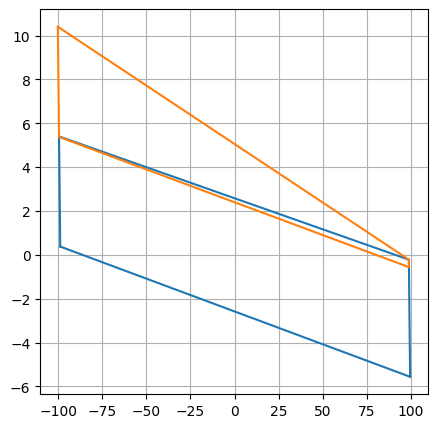

True


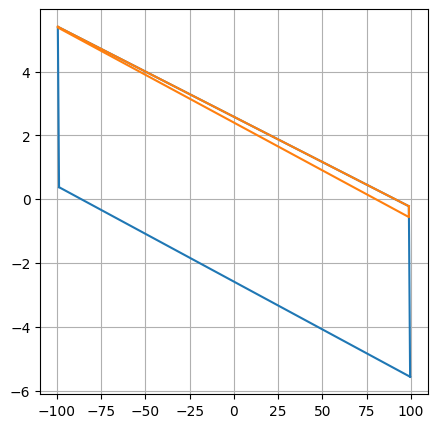

True


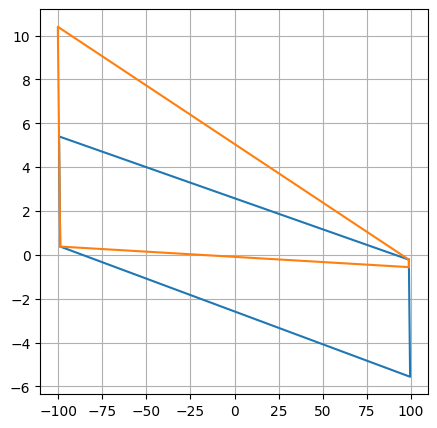

False


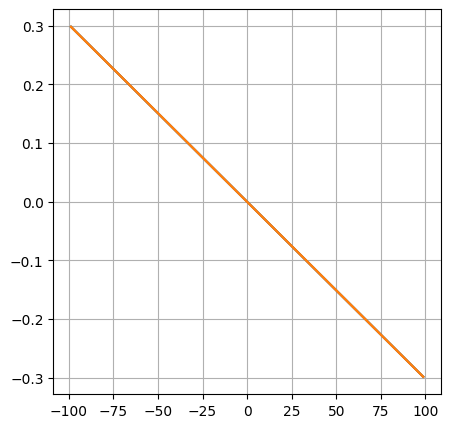

False


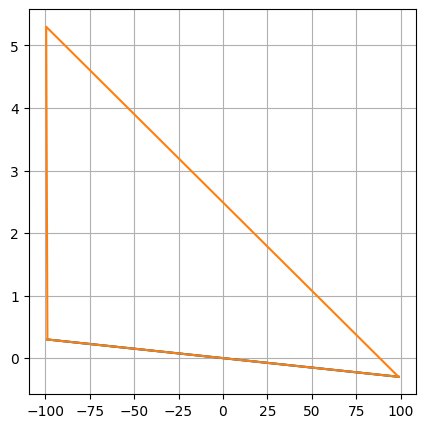

False


In [318]:
def faces_close(face1, face2, tol=1e-2):
    """Checks if two faces are close to each other.

    Assumes pillar grid construction.
    """
    def _distance_point_line(a, b, p):
        """Distance between point p and the line ab.

        Returns -1 if the line is undifined (a=b)."""
        n_ab = np.linalg.norm(b-a)
        if n_ab < tol:
            return -1
        return np.linalg.norm(np.cross(p-a, b-a)) / n_ab

    tests = [(0,3,0), (0,3,3), (1,2,1), (1,2,2)]
    for f1,f2 in [(face1, face2), (face2, face1)]:
        errors = 0
        for i, j, k in tests:
            p_ab = _distance_point_line(f1[i], f1[j], f2[k])
            errors += max(0, -p_ab)
            if p_ab > tol:
                return False
        if errors > 2:
            return False
    return True

plot_faces2(np.hstack([face1, face2]))
plt.show()
print(faces_close(face1, face2))

plot_faces2(np.hstack([face1, face_triang_ok]))
plt.show()
print(faces_close(face1, face_triang_ok))

plot_faces2(np.hstack([face2, face_problem]))
plt.show()
print(faces_close(face_problem, face2))

plot_faces2(np.hstack([face_problem, face_problem]))
plt.show()
print(faces_close(face_problem, face_problem))

plot_faces2(np.hstack([face1, face_problem]))
plt.show()
print(faces_close(face_problem, face1))

* Resolver o cenário em que temos duas faces triângulo e a 'ponta' de ambos está no mesmo lado.
    * Se as pontas forem próximas, ok
    * Faces serão próximas se as duas pontas formarem uma linha aproximadamente paralela à linha formada no outro lado.

In [214]:
def line_intersection(line1, line2):
    """Point closest to two lines defined by two points each.

    Returns mean of given points if lines are parallel.
    """
    e1 = line1[1] - line1[0]
    e2 = line2[1] - line2[0]
    n = np.cross(e1, e2)
    n2 = np.dot(n, n)
    if n2 < 1e-10:
        return (line1[0] + line1[1] + line2[0] + line2[1]) / 4
    t1 = np.dot(np.cross(e2, n),  line2[0] - line1[0]) / n2
    p1 = line1[0] + t1 * e1
    t2 = np.dot(np.cross(e1, n),  line2[0] - line1[0]) / n2
    p2 = line2[0] + t2 * e2
    return (p1 + p2) / 2

line1 = np.array([[0,1,1], [1,0,1]])
line2 = np.array([[0,0,0], [1,1,0]])
print(line_intersection(line1, line2))

line1 = np.array([[0,1,1], [1,0,1]])
line2 = np.array([[0,0.5,0], [1,.5,0]])
print(line_intersection(line1, line2))

line1 = np.array([[0,1,0.5], [1,0,1.5]])
line2 = np.array([[0,0,-0.5], [1,1,0.5]])
print(line_intersection(line1, line2))

[0.5 0.5 0.5]
[0.5 0.5 0.5]
[0.5  0.75 0.5 ]


In [215]:
top_left_1 = face1[0]
top_right_1 = face1[1]
bottom_right_1 = face1[2]
bottom_left_1 = face1[3]

top_left_2 = face2[0]
top_right_2 = face2[1]
bottom_right_2 = face2[2]
bottom_left_2 = face2[3]


* Resolver como ordenar os pontos para fazer a análise.
    * Se todos os pontos coincidem entre si dentro da tolerância, usar a área total de uma das faces.
    * Se for em K, não calcular se não coincidir e dar erro de que não segue pillar grid.
    * Em I e J, usar K para ordenar os pontos.

## Bulk Volume

In [216]:
test_file_2phi = "../sr3/imex_2phi2k.sr3"
sr3_2phi = Sr3Reader(test_file_2phi)

In [217]:
def _get_bvol(self):
    dataset = self.file.get_table("SpatialProperties/000000/GRID")
    if "BVOL" in dataset:
        return dataset["BVOL"][:]
    bvol = []
    dIJK = dataset["BLOCKSIZE"][:]
    for c in dataset["IPSTCS"][:]:
        if c > sr3_2phi.grid.get_size('n_matrix'):
            c -= sr3_2phi.grid.get_size('n_matrix')
        di, dj, dk = dIJK[3*(c-1): 3*c]
        bvol.append(di*dj*dk)
    return np.array(bvol)

c = _get_bvol(sr3_2phi)
print(c.shape)
print(c)

c = _get_bvol(sr3)
print(c.shape)
print(c)


(14,)
[200000. 200000. 200000. 200000. 200000. 200000. 200000. 200000. 200000.
 200000. 200000. 200000. 200000. 200000.]
(67241,)
[28699.63026401 61408.91218703 65524.09631433 ... 50540.0020128
 50261.23052413 15743.05244144]


## Porous Volume

In [218]:
test_file_2phi = "../sr3/imex_2phi2k.sr3"
sr3_2phi = Sr3Reader(test_file_2phi)
dataset_2phi = sr3_2phi.file.get_table("SpatialProperties/000000/GRID")

In [219]:
def _get_block_p_vol(self, force_recalculation=False):
    dataset = self.file.get_table("SpatialProperties/000000/GRID")
    if "BLOCKPVOL" in dataset and not force_recalculation:
        return dataset["BLOCKPVOL"][:]
    bulk_vol = _get_bvol(self)
    por = self.file.get_table("SpatialProperties/000000/POR")[:]
    if not self.grid.has_fracture():
        return por * bulk_vol

    por_adj = self.data._grid_data_to_complete(False, por, ["MATRIX", "FRACTURE"])
    n_matrix = self.grid.get_size('n_matrix')
    por_adj = np.hstack([por_adj[n_matrix:], n_matrix*[0]])
    por_adj = self.data._grid_data_to_active(True, por_adj, ["MATRIX", "FRACTURE"])
    return por * bulk_vol * (1 - por_adj)

c = _get_block_p_vol(sr3_2phi, True)
print(c.shape)
print(c)
block_p_vol = dataset_2phi["BLOCKPVOL"][:]
print((np.abs(c - block_p_vol)/block_p_vol).max())

c = _get_block_p_vol(sr3, True)
print(c.shape)
print(c)
block_p_vol = dataset["BLOCKPVOL"][:]
print((np.abs(c - block_p_vol)/block_p_vol).max())

(14,)
[ 1979.99995619  3919.99991417  5819.99987394 18000.00023842
 19579.99990702 21119.9995923  22619.99929428  1999.9999553
  3999.99991059  5999.99986589 20000.00029802 21999.99988079
 23999.99946356 25999.99904633]
3.6679781400240387e-08
(67241,)
[4011.71856265 2391.9331748  4139.62832967 ... 6358.28388443 5637.23094711
 2537.90230373]
5.9420449624157654e-08


## Connections

In [220]:
from collections import defaultdict

In [221]:
def _build_connection_dict(self):
    dataset = self.file.get_table("SpatialProperties/000000/GRID")
    connection_dir = dataset["ICNTDR"][:]
    connection_cell1 = self.grid.active2complete(dataset["ICTPS1"][:])
    connection_cell2 = self.grid.active2complete(dataset["ICTPS2"][:])

    all_connections = np.hstack([
        connection_cell1.reshape(-1,1),
        connection_cell2.reshape(-1,1),
        connection_dir.reshape(-1,1)])

    connection_dict = defaultdict(list)
    for v in all_connections:
        connection_dict[v[0]].append(v)
        connection_dict[v[1]].append(v)

    return connection_dict

connections_ = _build_connection_dict(sr3)
for c in connections_[2205]:
    print(c)

[2158 2205    2]
[2205 2206    1]
[2205 2252    2]
[2205 4038    3]


In [222]:
def _get_isolated_cells(self):
    out = []
    connections_ = _build_connection_dict(self)
    for c in self.grid.active2complete():
        if c not in connections_:
            out.append(int(c))
    return np.array(out)

c = _get_isolated_cells(sr3)
print(c.shape)
print(c)

(577,)
[ 51737  61231  62644  62645  62691  62692  62738  64289  64454  64474
  64524  64525  64571  64572  64593  64622  64667  64988  65035  65036
  65082  65083  65084  65129  65130  65131  65178  66160  66243  66269
  66425  66472  66473  66672  66781  67357  67449  68007  68055  68125
  68365  68510  68512  68558  68559  69240  70001  70346  70535  70657
  70978  71072  71170  71215  71216  71217  71218  71264  71656  71660
  71750  71990  72084  72129  72179  72222  72413  72460  72507  72956
  74004  74141  78166  78213  78258  78260  79003  79188  80835  81418
  82026  82751  82859  83259  83268  83351  83445  83446  83447  83651
  84135  84692  86566  86567  86662  88305  88621  90139  90184  90282
  90328  90827  91971  92017  93850  93898  93899  94352  95637  95684
  95732  97981  98066  98074  98076  98121  98168  98312 101279 101419
 159339 296576 311004 311052 311523 313119 322000 322094 323788 323833
 323834 323835 323836 323880 323881 323882 323884 323927 323930 327454

In [223]:
def _get_non_neighbor_connections(self):
    dataset = self.file.get_table("SpatialProperties/000000/GRID")
    connection_dir = dataset["ICNTDR"][:]
    connection_cell1 = self.grid.active2complete(dataset["ICTPS1"][:])
    connection_cell2 = self.grid.active2complete(dataset["ICTPS2"][:])

    all_connections = np.hstack([
        connection_cell1.reshape(-1,1),
        connection_cell2.reshape(-1,1),
        connection_dir.reshape(-1,1)])

    def _is_neighbor(ijk1, ijk2):
        if len(ijk1.shape) == 1:
            return np.sum(np.abs(ijk1-ijk2)) == 1
        return np.sum(np.abs(ijk1-ijk2), axis=1) == 1

    ijk1 = self.grid.n2ijk(all_connections[:,0])
    ijk2 = self.grid.n2ijk(all_connections[:,1])

    n_ = _is_neighbor(ijk1, ijk2)
    return all_connections[~n_]

c = _get_non_neighbor_connections(sr3)
print(c.shape)
print(c)

c = _get_non_neighbor_connections(sr3_2phi)
print(c.shape)
print(c)

(4418, 3)
[[  9255  11135      2]
 [ 11088  12968      2]
 [ 12967  14799      1]
 ...
 [496520 501972      2]
 [498029 499909      2]
 [498076 499910      1]]
(0, 3)
[]
